.. _nb_callback:

## Callback

A `Callback` class can be used to receive a notification of the algorithm object each generation.
This can be useful to track metrics, do additional calculations, or even modify the algorithm object during the run.
The latter is only recommended for experienced users.

The example below implements a less memory-intense version of keeping track of the convergence. A posteriori analysis can one the one hand, be done by using the `save_history=True` option. This, however, stores a deep copy of the `Algorithm` object in each iteration. This might be more information than necessary, and thus, the `Callback` allows to select only the information necessary to be analyzed when the run has terminated. Another good use case can be to visualize data in each iteration in real-time.

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |      100 |  0.8314974785 |  0.3870993357
     2 |      200 |  0.5728811989 |  0.3071356545
     3 |      300 |  0.4523366436 |  0.1591399934
     4 |      400 |  0.3480841542 |  0.1222719318
     5 |      500 |  0.2572795703 |  0.1044558798
     6 |      600 |  0.1870256498 |  0.0939203003
     7 |      700 |  0.1423726057 |  0.0754587506
     8 |      800 |  0.1101575635 |  0.0417910154


     9 |      900 |  0.0891568703 |  0.0389292386
    10 |     1000 |  0.0693194019 |  0.0369356475
    11 |     1100 |  0.0543914587 |  0.0222330030
    12 |     1200 |  0.0428816950 |  0.0222330030
    13 |     1300 |  0.0342804012 |  0.0144665822
    14 |     1400 |  0.0269554965 |  0.0127357215
    15 |     1500 |  0.0213341787 |  0.0048246707
    16 |     1600 |  0.0164731825 |  0.0048246707


    17 |     1700 |  0.0131331443 |  0.0048246707
    18 |     1800 |  0.0103942386 |  0.0037500212
    19 |     1900 |  0.0086392811 |  0.0034754192
    20 |     2000 |  0.0068967406 |  0.0023935702


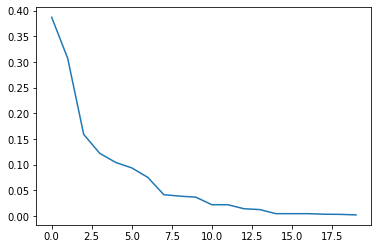

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.factory import get_problem
from pymoo.core.callback import Callback
from pymoo.optimize import minimize


class MyCallback(Callback):

    def __init__(self) -> None:
        super().__init__()
        self.data["best"] = []

    def notify(self, algorithm):
        self.data["best"].append(algorithm.pop.get("F").min())


problem = get_problem("sphere")

algorithm = GA(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 20),
               seed=1,
               callback=MyCallback(),
               verbose=True)

val = res.algorithm.callback.data["best"]
plt.plot(np.arange(len(val)), val)
plt.show()



**Note** that the `Callback` object from the `Result` object needs to be accessed `res.algorithm.callback` because the original object keeps unmodified to ensure reproducibility.

For completeness, the history-based convergence analysis looks as follows:

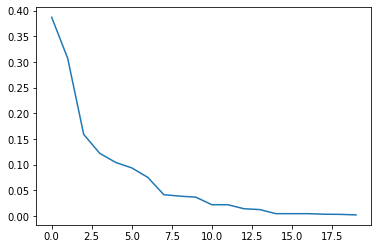

In [2]:
res = minimize(problem,
               algorithm,
               ('n_gen', 20),
               seed=1,
               save_history=True)

val = [e.opt.get("F")[0] for e in res.history]
plt.plot(np.arange(len(val)), val)
plt.show()